# Load QED-CCSD Data
This data considers the energy of the meta and ortho intermediates with a fixed geometry and different orientations of the field (by $\theta$ and $\phi$ values), which is equivalent to a rigid rotation about the field axis.

The following cell will load and interpolate this data on a $\theta,\phi$ grid.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

Loading META dataset...
Loaded 576 rows.

Loading ORTHO dataset...
Loaded 576 rows.

Processing: META CCSD
Data points: 576
Theta range: [0.0000, 180.0000]
Phi range: [0.0000, 360.0000]
Value range: [-3.007841e+03, -3.007754e+03]

Interpolation Accuracy Assessment:
------------------------------------------------------------
Successfully interpolated: 576/576

Absolute Error Statistics:
  Mean: 1.342136e-14
  Std:  7.696230e-14
  Max:  4.547474e-13
  Min:  0.000000e+00

Relative Error Statistics (%):
  Mean: 0.0000%
  Std:  0.0000%
  Max:  0.0000%

5 Worst Interpolation Points:
------------------------------------------------------------
1. Theta=164.3478, Phi=250.4348
   Original: -3007.801387, Interpolated: -3007.801387
   Error: 4.547474e-13, Relative: 0.0000%
2. Theta=140.8696, Phi=313.0435
   Original: -3007.824712, Interpolated: -3007.824712
   Error: 4.547474e-13, Relative: 0.0000%
3. Theta=164.3478, Phi=140.8696
   Original: -3007.821332, Interpolated: -3007.821332
   Error: 4.

/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_67439/2452111194.py:161: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ortho_df = pd.read_csv('CCSD_DATA/ortho_ccsd_energies.txt',


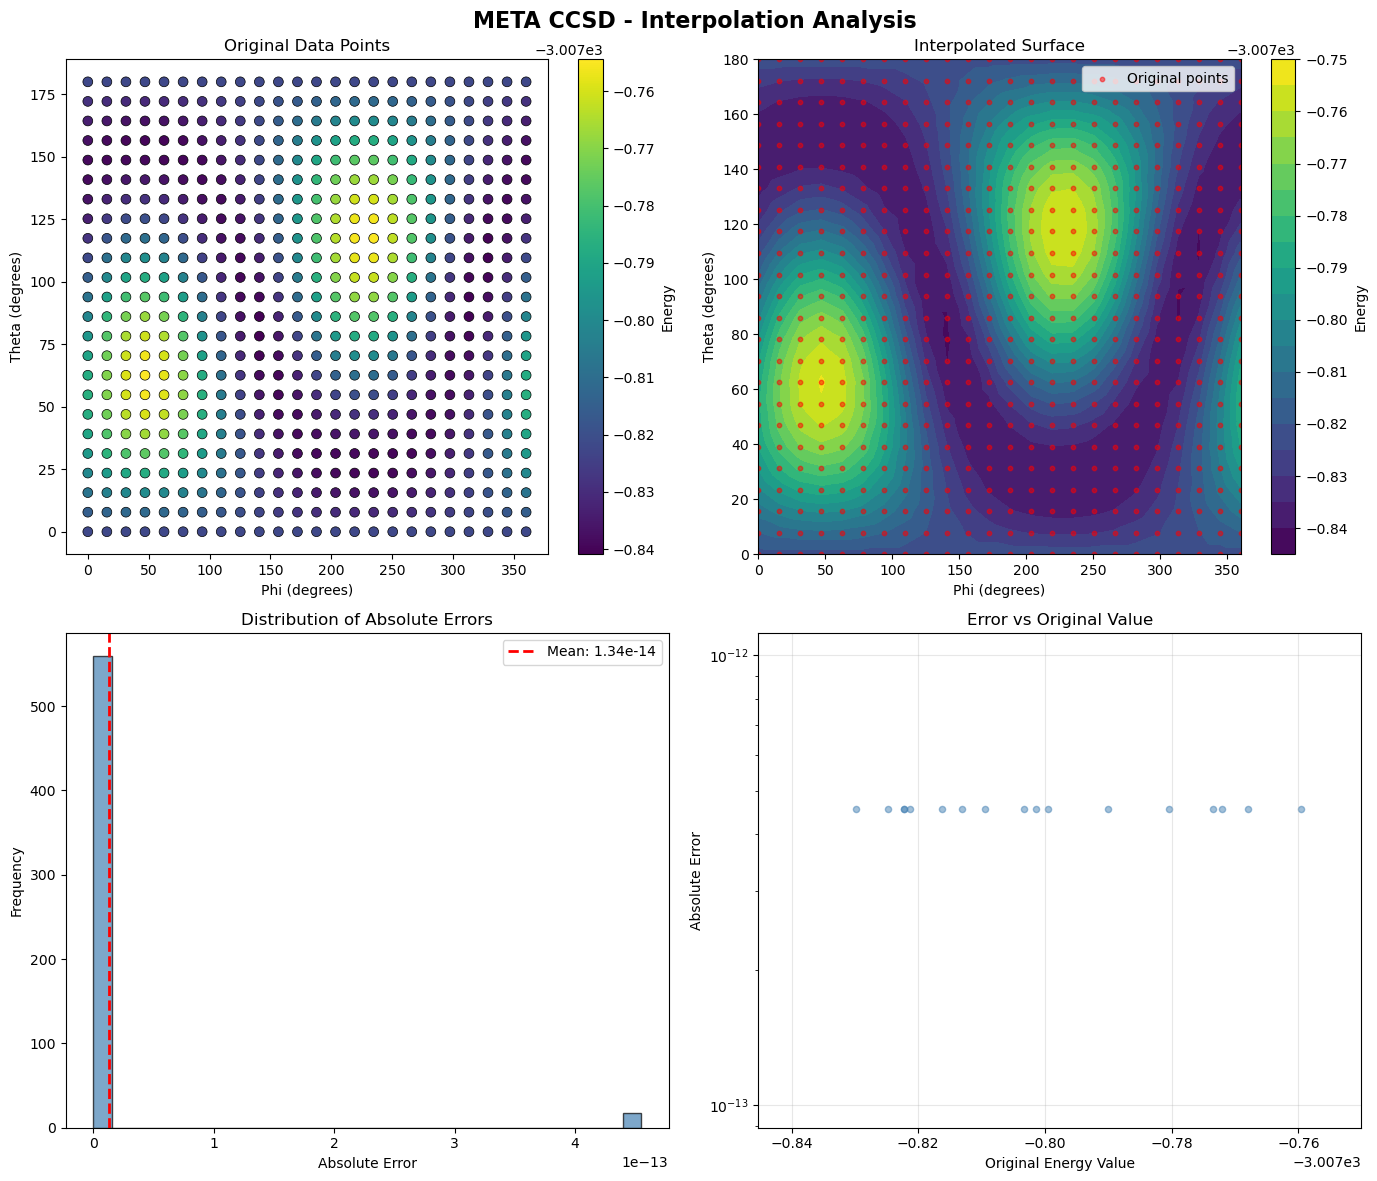


Processing: ORTHO CCSD
Data points: 576
Theta range: [0.0000, 180.0000]
Phi range: [0.0000, 360.0000]
Value range: [-3.007838e+03, -3.007778e+03]

Interpolation Accuracy Assessment:
------------------------------------------------------------
Successfully interpolated: 576/576

Absolute Error Statistics:
  Mean: 1.342136e-14
  Std:  7.696230e-14
  Max:  4.547474e-13
  Min:  0.000000e+00

Relative Error Statistics (%):
  Mean: 0.0000%
  Std:  0.0000%
  Max:  0.0000%

5 Worst Interpolation Points:
------------------------------------------------------------
1. Theta=86.0870, Phi=203.4783
   Original: -3007.806131, Interpolated: -3007.806131
   Error: 4.547474e-13, Relative: 0.0000%
2. Theta=156.5217, Phi=156.5217
   Original: -3007.823460, Interpolated: -3007.823460
   Error: 4.547474e-13, Relative: 0.0000%
3. Theta=39.1304, Phi=344.3478
   Original: -3007.818165, Interpolated: -3007.818165
   Error: 4.547474e-13, Relative: 0.0000%
4. Theta=117.3913, Phi=93.9130
   Original: -3007.82570

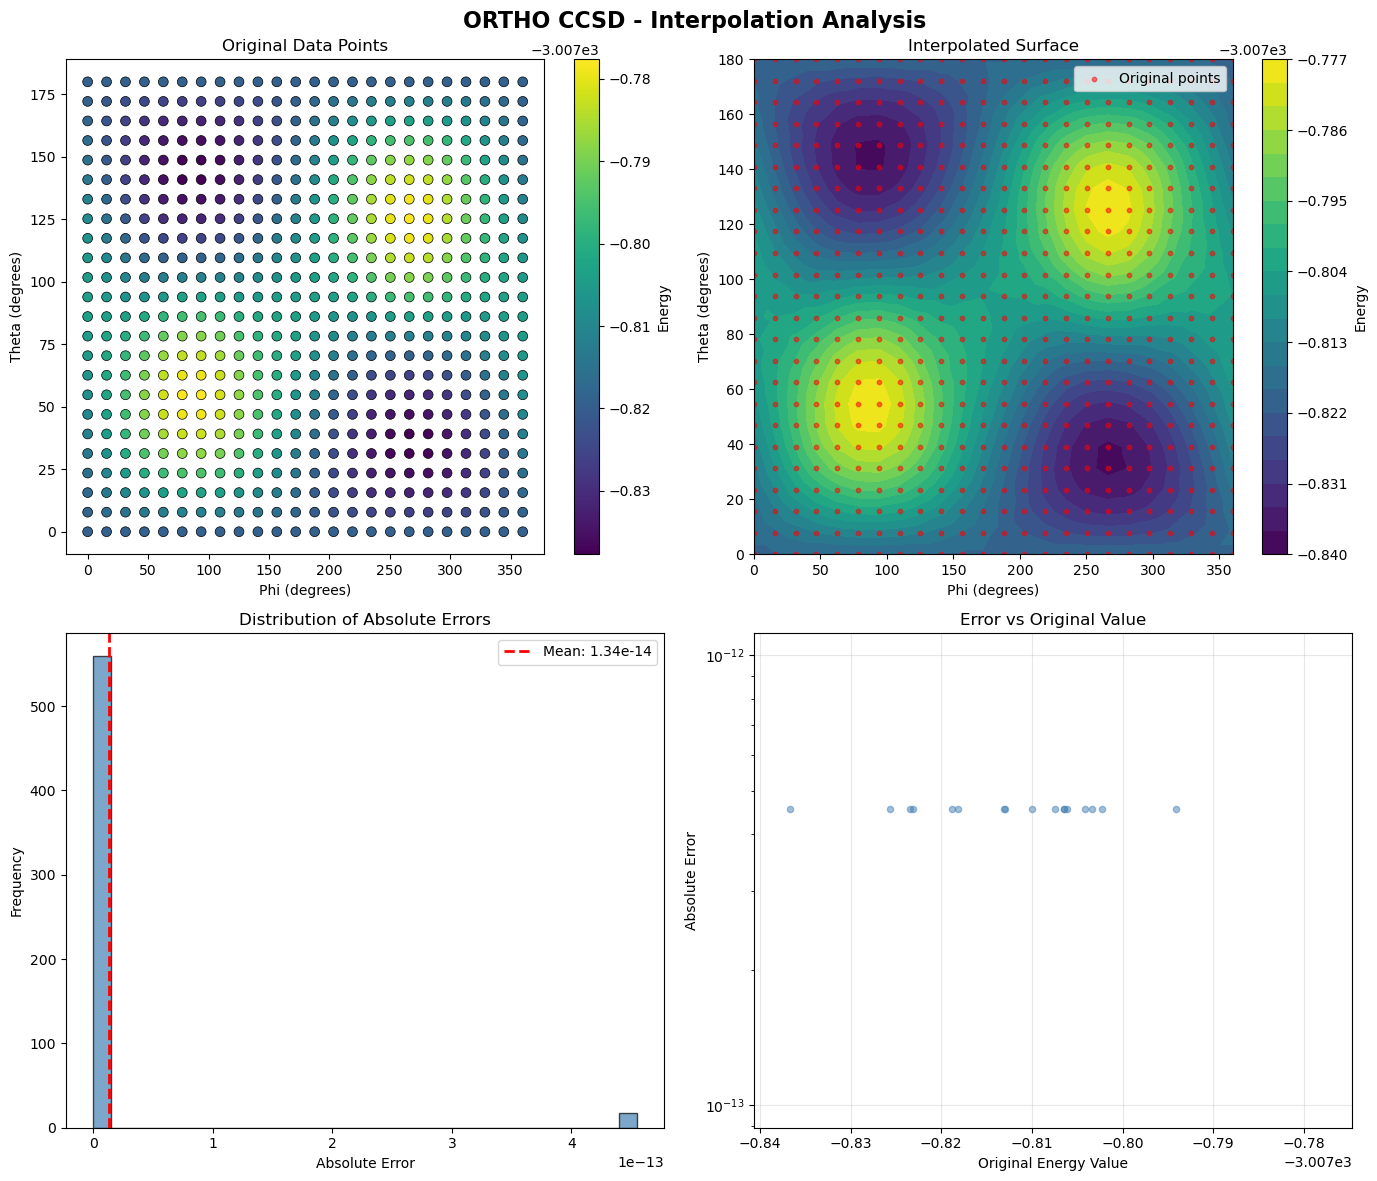


COMPARISON SUMMARY

Dataset         Points     Valid      Mean Abs Err    Mean Rel Err % 
----------------------------------------------------------------------
META CCSD       576        576        1.342136e-14    0.0000         
ORTHO CCSD      576        576        1.342136e-14    0.0000         


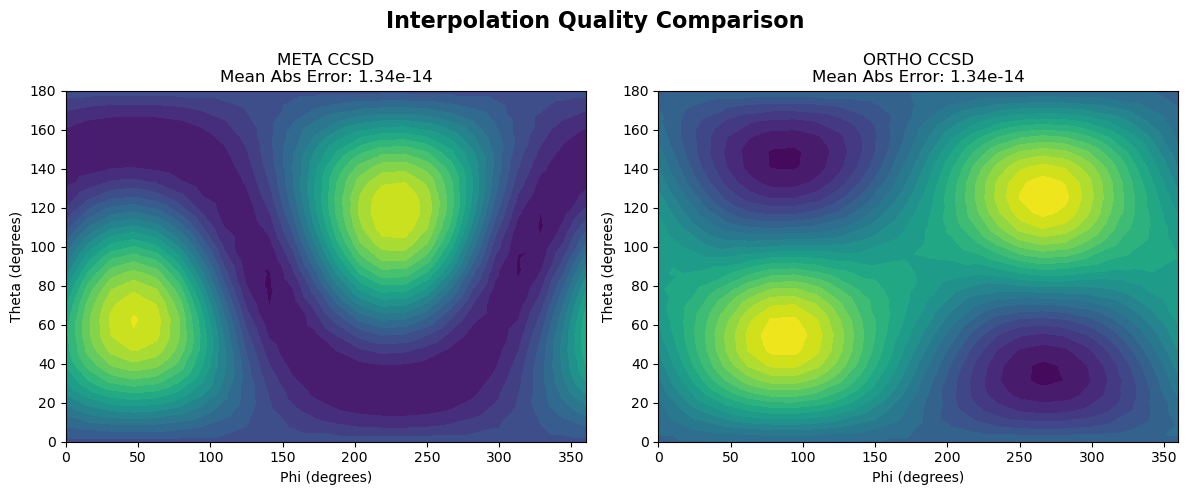


Analysis complete!


In [2]:
def load_and_analyze_dataset(df, dataset_name, n_grid_points=24):
    """
    Perform interpolation and accuracy analysis on a molecular energy dataset.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns 'theta', 'phi', 'value'
    dataset_name : str
        Name of the dataset for labeling plots
    n_grid_points : int
        Number of grid points for interpolation in each dimension
    
    Returns:
    --------
    dict : Dictionary containing interpolation results and statistics
    """
    
    print(f"\n{'='*60}")
    print(f"Processing: {dataset_name}")
    print(f"{'='*60}")
    
    # Extract values
    theta_vals = df['theta'].values
    phi_vals = df['phi'].values
    values = df['value'].values
    
    print(f"Data points: {len(values)}")
    print(f"Theta range: [{theta_vals.min():.4f}, {theta_vals.max():.4f}]")
    print(f"Phi range: [{phi_vals.min():.4f}, {phi_vals.max():.4f}]")
    print(f"Value range: [{values.min():.6e}, {values.max():.6e}]")
    
    # Create pivot table
    pivot_df = df.pivot_table(index='theta', columns='phi', values='value')
    pivot_df.index = pivot_df.index.round(4)
    pivot_df.columns = pivot_df.columns.round(4)
    
    # Create fine grid for interpolation
    # phi (x-axis): 0-360 degrees
    # theta (y-axis): 0-180 degrees
    phi_grid = np.linspace(phi_vals.min(), phi_vals.max(), n_grid_points)
    theta_grid = np.linspace(theta_vals.min(), theta_vals.max(), n_grid_points)
    PH, TH = np.meshgrid(phi_grid, theta_grid)  # phi varies along x, theta along y
    
    # Perform interpolation on grid
    grid_values = griddata((phi_vals, theta_vals), values, 
                          (PH, TH), method='linear')
    
    # Test accuracy: interpolate at original data points
    interpolated_at_original = griddata((phi_vals, theta_vals), values,
                                       (phi_vals, theta_vals), method='linear')
    
    # Calculate errors
    absolute_errors = np.abs(values - interpolated_at_original)
    relative_errors = np.abs((values - interpolated_at_original) / values) * 100
    
    # Remove NaN values (edge points)
    valid_mask = ~np.isnan(interpolated_at_original)
    absolute_errors_clean = absolute_errors[valid_mask]
    relative_errors_clean = relative_errors[valid_mask]
    values_clean = values[valid_mask]
    
    # Print statistics
    print(f"\nInterpolation Accuracy Assessment:")
    print(f"{'-'*60}")
    print(f"Successfully interpolated: {np.sum(valid_mask)}/{len(values)}")
    print(f"\nAbsolute Error Statistics:")
    print(f"  Mean: {np.mean(absolute_errors_clean):.6e}")
    print(f"  Std:  {np.std(absolute_errors_clean):.6e}")
    print(f"  Max:  {np.max(absolute_errors_clean):.6e}")
    print(f"  Min:  {np.min(absolute_errors_clean):.6e}")
    print(f"\nRelative Error Statistics (%):")
    print(f"  Mean: {np.mean(relative_errors_clean):.4f}%")
    print(f"  Std:  {np.std(relative_errors_clean):.4f}%")
    print(f"  Max:  {np.max(relative_errors_clean):.4f}%")
    
    # Find worst interpolation points
    worst_indices = np.argsort(absolute_errors_clean)[-5:]
    valid_indices = np.where(valid_mask)[0]
    
    print(f"\n5 Worst Interpolation Points:")
    print(f"{'-'*60}")
    for i, idx in enumerate(worst_indices):
        original_idx = valid_indices[idx]
        print(f"{i+1}. Theta={theta_vals[original_idx]:.4f}, Phi={phi_vals[original_idx]:.4f}")
        print(f"   Original: {values[original_idx]:.6f}, Interpolated: {interpolated_at_original[original_idx]:.6f}")
        print(f"   Error: {absolute_errors_clean[idx]:.6e}, Relative: {relative_errors_clean[idx]:.4f}%")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle(f'{dataset_name} - Interpolation Analysis', fontsize=16, fontweight='bold')
    
    # 1. Original data scatter plot
    scatter = axes[0, 0].scatter(df['phi'], df['theta'], c=df['value'], 
                                cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
    axes[0, 0].set_xlabel('Phi (degrees)')
    axes[0, 0].set_ylabel('Theta (degrees)')
    axes[0, 0].set_title('Original Data Points')
    plt.colorbar(scatter, ax=axes[0, 0], label='Energy')
    
    # 2. Interpolated surface
    contour = axes[0, 1].contourf(PH, TH, grid_values, levels=20, cmap='viridis')
    axes[0, 1].scatter(phi_vals, theta_vals, c='red', s=10, alpha=0.5, label='Original points')
    axes[0, 1].set_xlabel('Phi (degrees)')
    axes[0, 1].set_ylabel('Theta (degrees)')
    axes[0, 1].set_title('Interpolated Surface')
    axes[0, 1].legend()
    plt.colorbar(contour, ax=axes[0, 1], label='Energy')
    
    # 3. Absolute error distribution
    axes[1, 0].hist(absolute_errors_clean, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[1, 0].set_xlabel('Absolute Error')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Absolute Errors')
    axes[1, 0].axvline(np.mean(absolute_errors_clean), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(absolute_errors_clean):.2e}')
    axes[1, 0].legend()
    
    # 4. Error vs original value
    axes[1, 1].scatter(values_clean, absolute_errors_clean, alpha=0.5, s=20, color='steelblue')
    axes[1, 1].set_xlabel('Original Energy Value')
    axes[1, 1].set_ylabel('Absolute Error')
    axes[1, 1].set_title('Error vs Original Value')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Return results
    return {
        'dataset_name': dataset_name,
        'pivot_df': pivot_df,
        'phi_grid': phi_grid,
        'theta_grid': theta_grid,
        'PH': PH,
        'TH': TH,
        'grid_values': grid_values,
        'mean_abs_error': np.mean(absolute_errors_clean),
        'mean_rel_error': np.mean(relative_errors_clean),
        'max_abs_error': np.max(absolute_errors_clean),
        'n_valid': np.sum(valid_mask),
        'n_total': len(values)
    }


# ===== LOAD ALL DATASETS =====

# META dataset
print("Loading META dataset...")
meta_df = pd.read_csv('CCSD_DATA/meta_ccsd_energies.txt', sep='\s+', header=None, 
                      names=['filename', 'value'])
pattern = r"theta_(.*?)_phi_(.*?)\.json"
meta_df[['theta', 'phi']] = meta_df['filename'].str.extract(pattern).astype(float)
meta_df = meta_df[['theta', 'phi', 'value']]
print(f"Loaded {len(meta_df)} rows.")


# ORTHO dataset
print("\nLoading ORTHO dataset...")
ortho_df = pd.read_csv('CCSD_DATA/ortho_ccsd_energies.txt',
                       delim_whitespace=True,
                       header=None,
                       names=['theta', 'phi', 'value'])
print(f"Loaded {len(ortho_df)} rows.")


# ===== ANALYZE ALL DATASETS =====

meta_results = load_and_analyze_dataset(meta_df, "META CCSD", n_grid_points=500)
ortho_results = load_and_analyze_dataset(ortho_df, "ORTHO CCSD", n_grid_points=500)


# ===== COMPARISON SUMMARY =====

print(f"\n{'='*60}")
print("COMPARISON SUMMARY")
print(f"{'='*60}")

results = [meta_results, ortho_results]

print(f"\n{'Dataset':<15} {'Points':<10} {'Valid':<10} {'Mean Abs Err':<15} {'Mean Rel Err %':<15}")
print(f"{'-'*70}")
for r in results:
    print(f"{r['dataset_name']:<15} {r['n_total']:<10} {r['n_valid']:<10} "
          f"{r['mean_abs_error']:<15.6e} {r['mean_rel_error']:<15.4f}")

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Interpolation Quality Comparison', fontsize=16, fontweight='bold')

for i, r in enumerate(results):
    axes[i].contourf(r['PH'], r['TH'], r['grid_values'], levels=20, cmap='viridis')
    axes[i].set_xlabel('Phi (degrees)')
    axes[i].set_ylabel('Theta (degrees)')
    axes[i].set_title(f"{r['dataset_name']}\nMean Abs Error: {r['mean_abs_error']:.2e}")

plt.tight_layout()
plt.show()

print("\nAnalysis complete!")

In [ ]:
hartree_to_kcalmol = 627.5094740631

o_vals, phi_grid, theta_grid = ortho_results['grid_values'], ortho_results['phi_grid'],  ortho_results['theta_grid']
m_vals = meta_results['grid_values']

# Compute gradients on the entire grid
dE_dtheta_ortho, dE_dphi_ortho = np.gradient(o_vals, theta_grid, phi_grid)
dE_dtheta_meta, dE_dphi_meta = np.gradient(m_vals, theta_grid, phi_grid)

theta_central = 74.1  # 74.1° from z-axis
phi_central = 35.0    # 35° from x-axis in xy-plane

# Find nearest grid indices
phi_idx = np.argmin(np.abs(phi_grid - phi_central))
theta_idx = np.argmin(np.abs(theta_grid - theta_central))

# CORRECT indexing: [theta_idx, phi_idx] because theta is rows, phi is columns
ortho_gradient_phi = dE_dphi_ortho[theta_idx, phi_idx]
ortho_gradient_theta = dE_dtheta_ortho[theta_idx, phi_idx]
ortho_val = o_vals[theta_idx, phi_idx]

# Use the META gradients here (not ortho!)
meta_gradient_phi = dE_dphi_meta[theta_idx, phi_idx]
meta_gradient_theta = dE_dtheta_meta[theta_idx, phi_idx]
meta_val = m_vals[theta_idx, phi_idx]

# Convert from hartree/degree to hartree/radian
#gradient_per_radian = gradient_per_degree * (np.pi / 180)
conversion_factor = 180 / np.pi  # degrees per radian

ortho_gradient_phi_rad = ortho_gradient_phi * conversion_factor
ortho_gradient_theta_rad = ortho_gradient_theta * conversion_factor
meta_gradient_phi_rad = meta_gradient_phi * conversion_factor
meta_gradient_theta_rad = meta_gradient_theta * conversion_factor


print(f"At phi={phi_grid[phi_idx]:.2f}, theta={theta_grid[theta_idx]:.2f}:")
print(f"  Ortho  E     = {ortho_val:.6e}")
print(f"  Ortho ∂E/∂φ  = {ortho_gradient_phi_rad:.6e}")
print(f"  Ortho ∂E/∂θ  = {ortho_gradient_theta_rad:.6e}")
print(f"  Meta   E     = {meta_val:.6e}")
print(f"  Meta  ∂E/∂φ  = {meta_gradient_phi_rad:.6e}")
print(f"  Meta  ∂E/∂θ  = {meta_gradient_theta_rad:.6e}")
print(f"  Ortho-Meta E = {(ortho_val-meta_val)*hartree_to_kcalmol:.2f} eV")



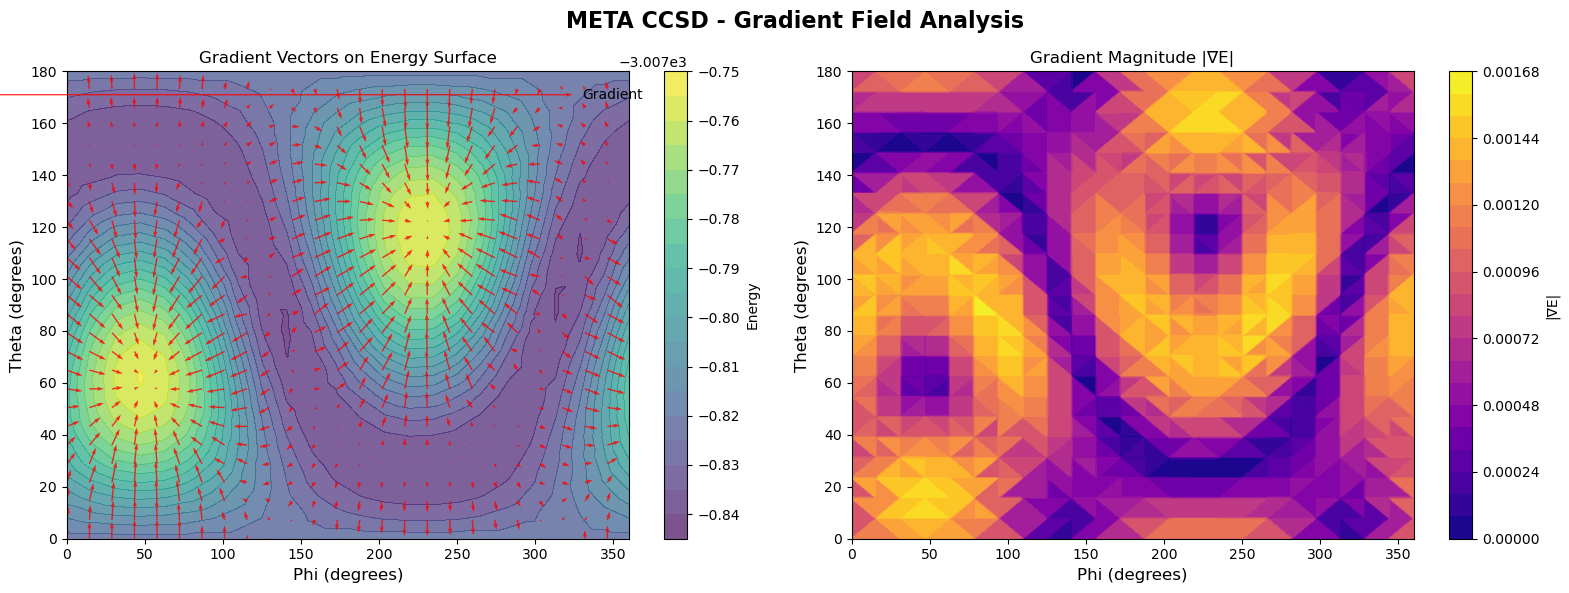


Gradient Statistics for META CCSD:
------------------------------------------------------------
∂E/∂φ range: [-1.374299e-03, 1.240679e-03]
∂E/∂θ range: [-1.537248e-03, 1.549631e-03]
|∇E| mean: 8.405018e-04
|∇E| max: 1.605639e-03


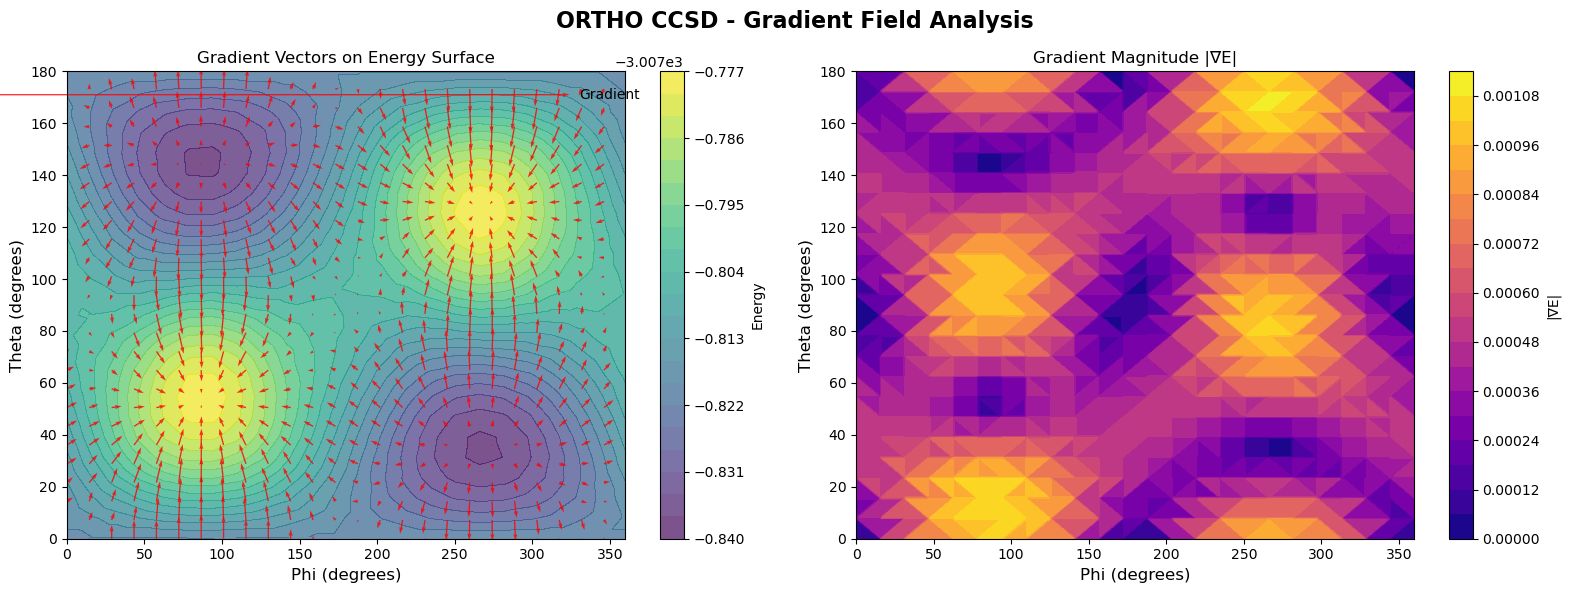


Gradient Statistics for ORTHO CCSD:
------------------------------------------------------------
∂E/∂φ range: [-4.401125e-04, 4.615151e-04]
∂E/∂θ range: [-1.082280e-03, 1.074949e-03]
|∇E| mean: 5.222960e-04
|∇E| max: 1.083233e-03


In [3]:
# Add this to your load_and_analyze_dataset function, or run separately:

def plot_gradient_field(phi_grid, theta_grid, grid_values, dataset_name, 
                        subsample=4):
    """
    Create a gradient field visualization showing energy gradients.
    
    Parameters:
    -----------
    phi_grid : 1D array
        Phi coordinates
    theta_grid : 1D array
        Theta coordinates
    grid_values : 2D array
        Interpolated energy values
    dataset_name : str
        Name for plot title
    subsample : int
        Plot every Nth arrow (to avoid overcrowding)
    """
    
    # Compute gradients
    dE_dtheta, dE_dphi = np.gradient(grid_values, theta_grid, phi_grid)
    
    # Create meshgrid for plotting
    PH, TH = np.meshgrid(phi_grid, theta_grid)
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{dataset_name} - Gradient Field Analysis', 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: Gradient field over energy contours
    contour = axes[0].contourf(PH, TH, grid_values, levels=20, 
                               cmap='viridis', alpha=0.7)
    
    # Subsample for cleaner arrows
    quiver = axes[0].quiver(PH[::subsample, ::subsample], 
                           TH[::subsample, ::subsample],
                           dE_dphi[::subsample, ::subsample],
                           dE_dtheta[::subsample, ::subsample],
                           color='red', alpha=0.8, scale=None)
    
    axes[0].set_xlabel('Phi (degrees)', fontsize=12)
    axes[0].set_ylabel('Theta (degrees)', fontsize=12)
    axes[0].set_title('Gradient Vectors on Energy Surface')
    plt.colorbar(contour, ax=axes[0], label='Energy')
    axes[0].quiverkey(quiver, 0.9, 0.95, 1, 'Gradient', labelpos='E')
    
    # Plot 2: Gradient magnitude
    gradient_magnitude = np.sqrt(dE_dphi**2 + dE_dtheta**2)
    
    magnitude_plot = axes[1].contourf(PH, TH, gradient_magnitude, 
                                      levels=20, cmap='plasma')
    axes[1].set_xlabel('Phi (degrees)', fontsize=12)
    axes[1].set_ylabel('Theta (degrees)', fontsize=12)
    axes[1].set_title('Gradient Magnitude |∇E|')
    plt.colorbar(magnitude_plot, ax=axes[1], label='|∇E|')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nGradient Statistics for {dataset_name}:")
    print(f"{'-'*60}")
    print(f"∂E/∂φ range: [{np.nanmin(dE_dphi):.6e}, {np.nanmax(dE_dphi):.6e}]")
    print(f"∂E/∂θ range: [{np.nanmin(dE_dtheta):.6e}, {np.nanmax(dE_dtheta):.6e}]")
    print(f"|∇E| mean: {np.nanmean(gradient_magnitude):.6e}")
    print(f"|∇E| max: {np.nanmax(gradient_magnitude):.6e}")
    
    return dE_dphi, dE_dtheta, gradient_magnitude


# Use it with your results:
dE_dphi_meta, dE_dtheta_meta, grad_mag_meta = plot_gradient_field(
    meta_results['phi_grid'], 
    meta_results['theta_grid'], 
    meta_results['grid_values'],
    "META CCSD",
    subsample=20  # Adjust to control arrow density
)

dE_dphi_ortho, dE_dtheta_ortho, grad_mag_ortho = plot_gradient_field(
    ortho_results['phi_grid'], 
    ortho_results['theta_grid'], 
    ortho_results['grid_values'],
    "ORTHO CCSD",
    subsample=20
)

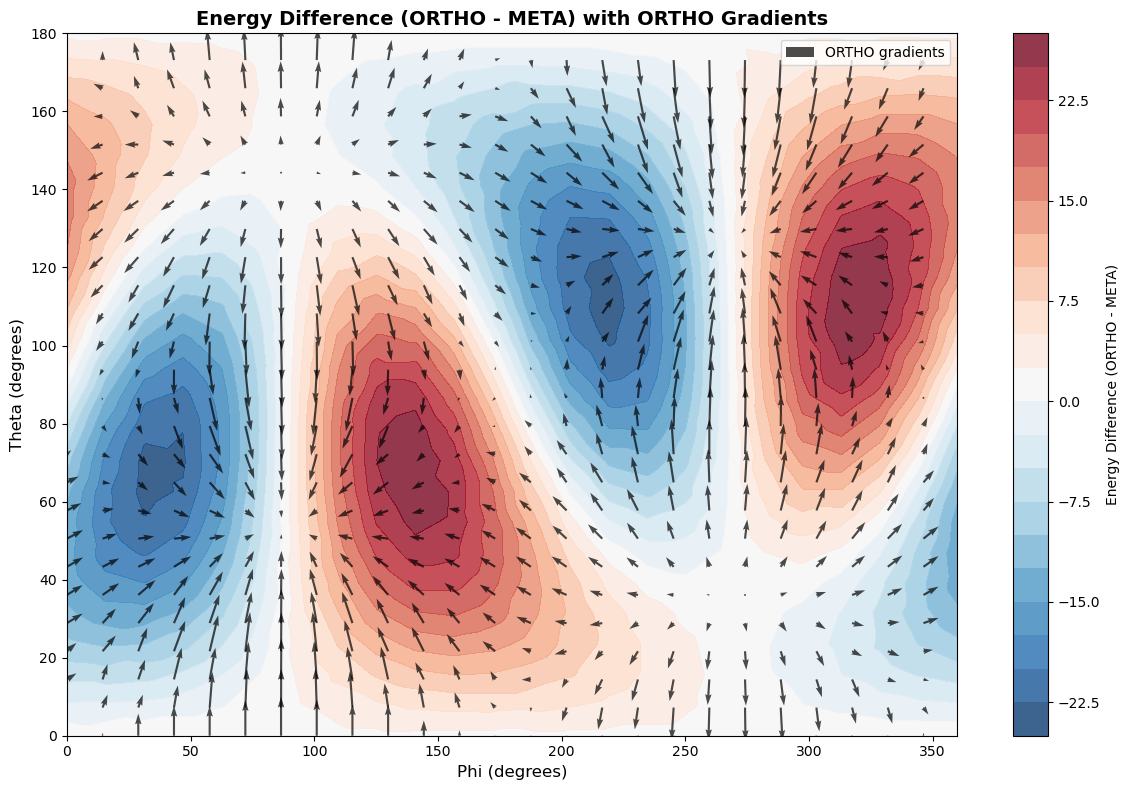


Energy Difference Statistics:
------------------------------------------------------------
Mean difference: 1.507286e+00
Std difference: 1.154111e+01
Max difference: 2.734684e+01
Min difference: -2.370978e+01

ORTHO Gradient Magnitude:
  Mean: 5.222960e-04
  Max: 1.083233e-03


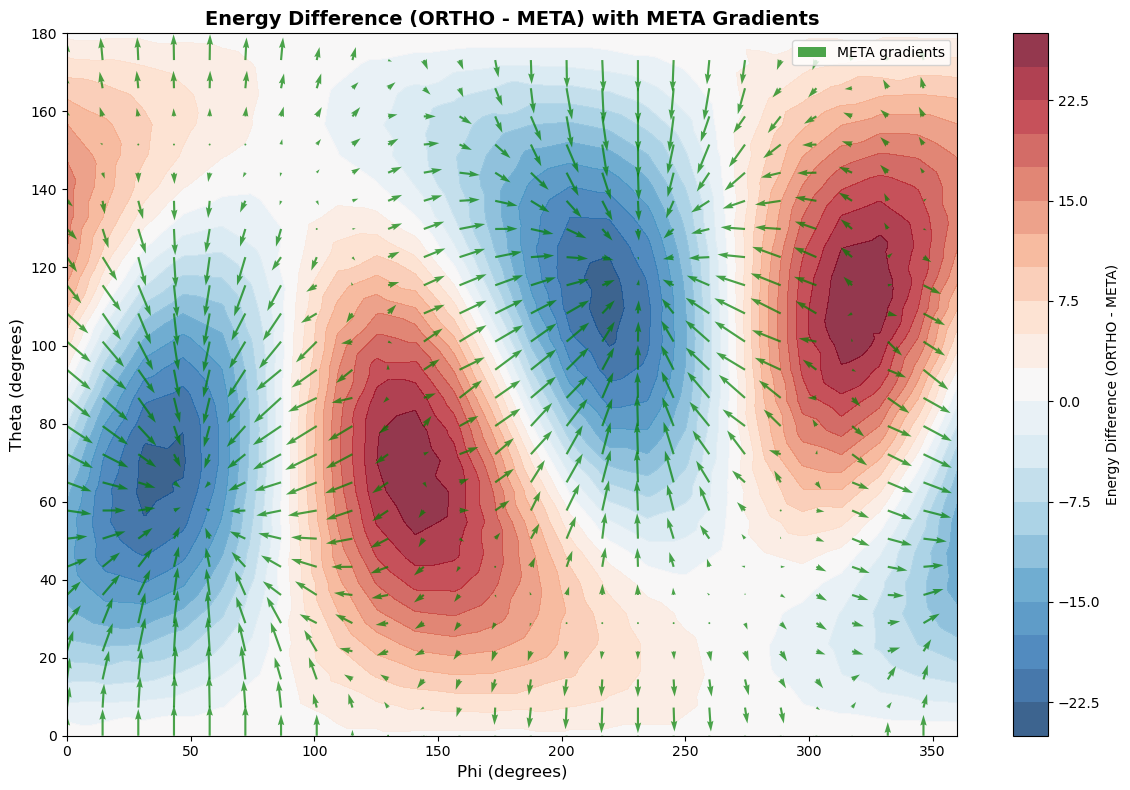


Energy Difference Statistics:
------------------------------------------------------------
Mean difference: 1.507286e+00
Std difference: 1.154111e+01
Max difference: 2.734684e+01
Min difference: -2.370978e+01

META Gradient Magnitude:
  Mean: 8.405018e-04
  Max: 1.605639e-03


In [6]:
def plot_energy_difference_with_gradients(meta_results, ortho_results, 
                                          gradient_source='ortho',
                                          subsample=4, file_name="test.png"):
    """
    Plot energy difference (ortho - meta) with gradient vectors overlaid.
    
    Parameters:
    -----------
    meta_results : dict
        Results from META dataset
    ortho_results : dict
        Results from ORTHO dataset
    gradient_source : str
        Which gradients to overlay: 'ortho', 'meta', or 'both'
    subsample : int
        Plot every Nth arrow
    """
    hartree_to_kcalmol = 627.5094740631
    
    # Calculate energy difference
    energy_diff = (ortho_results['grid_values'] - meta_results['grid_values']) * hartree_to_kcalmol
    
    # Get grids (assuming same grid for both)
    phi_grid = meta_results['phi_grid']
    theta_grid = meta_results['theta_grid']
    PH, TH = np.meshgrid(phi_grid, theta_grid)
    
    # Compute gradients for selected source(s)
    if gradient_source in ['ortho', 'both']:
        dE_dtheta_ortho, dE_dphi_ortho = np.gradient(
            ortho_results['grid_values'], theta_grid, phi_grid)
    
    if gradient_source in ['meta', 'both']:
        dE_dtheta_meta, dE_dphi_meta = np.gradient(
            meta_results['grid_values'], theta_grid, phi_grid)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot energy difference as contours
    contour = ax.contourf(PH, TH, energy_diff, levels=20, 
                         cmap='RdBu_r', alpha=0.8)
    
    # Overlay gradient vectors
    if gradient_source == 'ortho':
        quiver = ax.quiver(PH[::subsample, ::subsample], 
                          TH[::subsample, ::subsample],
                          dE_dphi_ortho[::subsample, ::subsample],
                          dE_dtheta_ortho[::subsample, ::subsample],
                          color='black', alpha=0.7, 
                          label='ORTHO gradients')
        
    elif gradient_source == 'meta':
        quiver = ax.quiver(PH[::subsample, ::subsample], 
                          TH[::subsample, ::subsample],
                          dE_dphi_meta[::subsample, ::subsample],
                          dE_dtheta_meta[::subsample, ::subsample],
                          color='green', alpha=0.7,
                          label='META gradients')
        
    elif gradient_source == 'both':
        quiver1 = ax.quiver(PH[::subsample, ::subsample], 
                           TH[::subsample, ::subsample],
                           dE_dphi_ortho[::subsample, ::subsample],
                           dE_dtheta_ortho[::subsample, ::subsample],
                           color='black', alpha=0.6,
                           label='ORTHO gradients', width=0.003)
        
        quiver2 = ax.quiver(PH[::subsample, ::subsample], 
                           TH[::subsample, ::subsample],
                           dE_dphi_meta[::subsample, ::subsample],
                           dE_dtheta_meta[::subsample, ::subsample],
                           color='green', alpha=0.6,
                           label='META gradients', width=0.003)
    
    ax.set_xlabel('Phi (degrees)', fontsize=12)
    ax.set_ylabel('Theta (degrees)', fontsize=12)
    ax.set_title(f'Energy Difference (ORTHO - META) with {gradient_source.upper()} Gradients',
                fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax, label='Energy Difference (ORTHO - META)')
    
    # Add legend
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig(file_name, dpi=200)
    plt.show()
    # Print statistics
    print(f"\nEnergy Difference Statistics:")
    print(f"{'-'*60}")
    print(f"Mean difference: {np.nanmean(energy_diff):.6e}")
    print(f"Std difference: {np.nanstd(energy_diff):.6e}")
    print(f"Max difference: {np.nanmax(energy_diff):.6e}")
    print(f"Min difference: {np.nanmin(energy_diff):.6e}")
    
    if gradient_source in ['ortho', 'both']:
        grad_mag_ortho = np.sqrt(dE_dphi_ortho**2 + dE_dtheta_ortho**2)
        print(f"\nORTHO Gradient Magnitude:")
        print(f"  Mean: {np.nanmean(grad_mag_ortho):.6e}")
        print(f"  Max: {np.nanmax(grad_mag_ortho):.6e}")
    
    if gradient_source in ['meta', 'both']:
        grad_mag_meta = np.sqrt(dE_dphi_meta**2 + dE_dtheta_meta**2)
        print(f"\nMETA Gradient Magnitude:")
        print(f"  Mean: {np.nanmean(grad_mag_meta):.6e}")
        print(f"  Max: {np.nanmax(grad_mag_meta):.6e}")


# Usage examples:

# Overlay ORTHO gradients on difference plot
plot_energy_difference_with_gradients(meta_results, ortho_results, 
                                     gradient_source='ortho', subsample=20, file_name="ortho_grad.png")

# Overlay META gradients on difference plot
plot_energy_difference_with_gradients(meta_results, ortho_results, 
                                     gradient_source='meta', subsample=20, file_name="meta_grad.png")

# Overlay both (compare gradient directions)
#plot_energy_difference_with_gradients(meta_results, ortho_results, 
#                                     gradient_source='both', subsample=6)